<a href="https://colab.research.google.com/github/hida0/ESAA/blob/HW/Week11_HW2_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 개념 정리 & 필사
(파이썬 머신러닝 완벽가이드 ch5. 1-5 pg. 290-318 (pg. 303-310 제외))
### 1. 회귀
- 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭한다.
- 회귀는 지도학습 중 하나로, 예측값이 카테고리와 같은 이산형 클래스 값인 분류와 다르게 **예측값이 연속형 숫자 값**이다.
- 회귀에서 가장 중요한 것은 회귀 계수이다. 회귀 계수의 선형/비선형 여부에 따라 **선형 회귀**/**비선형 회귀**로 나뉘고, 독립 변수가 1개/여러개인지에 따라 **단일 회귀**/**다중 회귀**로 나뉜다.
- 선형 회귀는 **실제값과 예측값의 차이인 오류의 제곱값을 최소화**하는 직선형 회귀선을 최적화하는 방식이다.
- 일반적인 선형 회귀의 과적합 문제를 해결하기 위해 **회귀 계수에 페널티 값을 적용**하는 것을 **규제**라고 하며, 선형 회귀 모델은 규제 방법에 따라 나뉜다.

> **일반 선형 회귀**: 예측값과 실제값의 **오차 제곱합**(RSS, Residual Sum of Squares)**을 최소화**할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델이다.

> **릿지(Ridge)**: 릿지 회귀는 **선형 회귀에 L2 규제를 추가**한 회귀 모델이다. L2 규제는 **상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는** 규제 모델이다.

> **라쏘(Lasso)**: 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식이다. L2 규제가 회귀 계수 값의 크기를 줄이는 반면, L1 규제는 **예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것**이다. 

> **엘라스틱넷(ElasticNet)**: **L2, L1 규제를 함께 결합**한 모델이다. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정한다.

> **로지스틱 회귀(Logistic Regression)**: **분류에 사용되는 선형 모델**로, 매우 강력한 분류 알고리즘이다. 

### 2. 단순 선형 회귀를 통한 회귀 이해
- 단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀이다.
- 예측값 $\widehat{Y} = w0 + w1*X$ 로 계산할 수 있으며, 독립변수가 1개인 단순 선형 회귀에서는 기울기 $w_1$과 절편 $w_0$를 회귀 계수로 지칭한다.
- 회귀 모델을 이러한 1차 함수로 모델링했다면, 실제 주택 가격은 1차 함수 값에서 실제 값만큼의 오류값을 빼거나 더한 값인 $w0 + w1*X+오류값$이 된다.
- 실제값과 회귀 모델의 차이에 따른 오류값을 남은 오류, 즉 **잔차**라고 한다.
- 최적의 회귀 모델을 만든다는 것은 **전체 데이터의 잔차의 합이 최소가 되는 모델을 만든다**는 의미이며, 동시에 오류값의 합이 최소가 될 수 있는 **최적의 회귀 계수를 찾는다**는 의미이다.
- 오류값은 (+)와 (-) 모두 가능하므로, 보통 오류값의 합을 구할 때에는 **절대값**을 취해서 더하거나(**Mean Absolute Erro**r), **오류값의 제곱**을 구해서 더하는 방식(**RSS, Residual Sum of Square**)을 사용한다. 일반적으로는 RSS 방식을 많이 사용한다. 즉 $Error^2=RSS$ 이다.
- RSS를 최소로 하는 $w_0, w_1$ 즉 회귀 계수를 학습을 통해서 찾는 것이 머신러닝 기반 회귀의 핵심 사항이다.
- $RSS(w_0, w_1) = \frac{1}{N}{\sum_{i=1}^N(Yi-(w0 + w1*Xi))^2}$
- 회귀에서 **RSS는 비용**(Cost)이며, w 변수로 구성되는 RSS를 **비용 함수** 또는 손실 함수라고 한다. 
- 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 **비용 함수가 반환하는 값(오류값)을 지속해서 감소**시키고, 최종적으로 **더 이상 감소하지 않는 최소의 오류값을 구하는 것**이다.

### 3. 비용 최소화하기 - **경사 하강법(Gradient Descent)**
- 경사 하강법은 점진적으로 반복적인 계산을 통해 w 파라미터 값을 업데이트하면서 **오류값이 최소가 되는 w 파라미터를 구하는 방식**이다.
- 반복적으로 비용 함수의 반환값, 즉 예측값과 실제값의 차이인 오류값이 작아지는 방향성을 가지고 w 파라미터를 지속적으로 보정한다. 그리고 오류값이 더 이상 작아지지 않으면 그 **오류값을 최소 비용으로 판단**하고 **그 때의 w 값을 최적 파라미터로 반환**한다.
- 비용 함수를 R(w)라고 할때, $R(w) = \frac{1}{N}{\sum_{i=1}^N(Yi-(w0 + w1*Xi))^2}$ 이며, 두 개의 w 파라미터인 $w_0, w_1$에 대해 각각 편미분을 적용해야 한다.
- w0 편미분 결과:  $\frac{2}{N}{\sum_{i=1}^N(Yi-(w0+w1*Xi))}$
- w1 편미분 결과:  $-\frac{2}{N}{\sum_{i=1}^NXi*(Yi-(w0+w1*Xi))}$
- w0과 w1의 편미분 결과값을 반복적으로 보정하면서 $w_0, w_1$ 값을 업데이트하여 비용 함수 R(w)가 최소가 되는 $w_0, w_1$을 구할 수 있다.
- 이러한 원리의 경사 하강법을 파이썬 코드로 구현할 수 있다.
- 간단한 회귀식인 $Y = 4X+6$ 을 근사하기 위해 100개의 데이터 세트를 만들고, 경사 하강법을 이용하여 회귀 계수인 $w_0, w_1$을 도출한다.

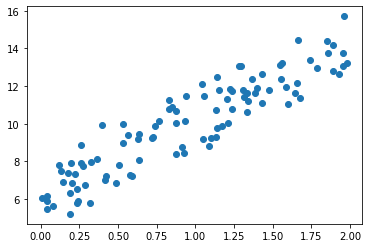

In [1]:
# 단순 선형 회귀로 예측할 만한 데이터 세트 생성
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 6 + 4*X + np.random.randn(100, 1) # Y=4X+6을 근사, 임의의 값은 노이즈를 위해 만듦

# 산점도로 X, Y 시각화
plt.scatter(X, y)
plt.show()

In [15]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w0, w1의 shape과 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측값 배열을 계산하고 실제값과의 차이를 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬을 생성
    w0_factors = np.ones((N, 1))

    # w1과 w0을 업데이트 할 w1_update, w0_update를 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [16]:
# get_weight_updates()를 경사 하강법으로 반복 수행하여 w1과 w0을 업데이트 하는 함수 gradient_descent_steps() 함수 생성
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates()를 호출하여 w0, w1 업데이트를 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [17]:
# 비용 함수 get_cost() 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [18]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1: {0:.3f} w0: {1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print("Gradient Descent Total Cost: {0:.4f}".format(get_cost(y, y_pred)))

w1: 4.022 w0: 6.162
Gradient Descent Total Cost: 0.9935


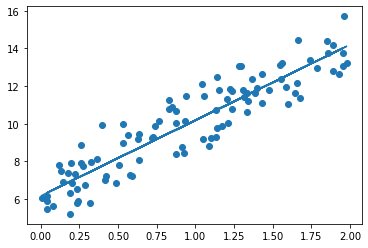

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

### 3. 비용 최소화하기 - **경사 하강법(Gradient Descent)**
- 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용 함수 최소화를 위한 값을 업데이트 하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있다.
- 실전에서는 대부분 **확률적 경사 하강법**(Stochastic Gradient Descent)를 이용한다.
- 확률적 경사 하강법은 전체 입력 데이터로 w가 업데이트 되는 값을 계산하는 것이 아니라, **일부 데이터만 이용하여 w가 업데이트 되는 값을 계산**하므로 경사 하강법에 비해서 빠른 속도를 보장한다.
- 확률적 경사 하강법의 구현 함수는 기존 경사 하강법 함수에, 전체 X, y  데이터에서 **랜덤하게 batch_size 만큼 데이터를 추출**하여 이를 기반으로 w1_update, w0_update를 계산하는 부분이 추가된다.

In [19]:
# 확률적 경사 하강법의 함수 구현
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index]
        sample_y = y[stochastic_random_index]
        # 랜덤하게 batch_size만큼 추출된 데이터를 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [20]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print("Stochastic Gradient Descent Total Cost: {0:.4f}".format(get_cost(y, y_pred)))

w1: 4.022 w0: 6.162
Stochastic Gradient Descent Total Cost: 0.9935


### 3. 비용 최소화하기 - **경사 하강법(Gradient Descent)**
- 피처가 여러 개인 다중 회귀에서도 단순 선형 회귀의 경우를 확장하여 유사하게 도출할 수 있다.
- 피처가 M개라면, 그에 따른 회귀 계수도 M+1개로 도출된다.
- 마찬가지로 데이터의 개수가 N이고 피처가 M개인 입력 행렬을 $X_{mat}$, 회귀 계수 $w_1, w_2, ..., w_{100}$을 W 배열로 표기하면 예측행렬 $\widehat{Y}=np.dot(X_{mat}, W^T) + w_0$ 로 구할 수 있다.

### 4. 다항 회귀와 과대적합/과소적합 이해
### 4-1. 다항 회귀 이해
- 지금까지의 회귀는 $y = w_0+w_1*x_1+w_2*x_2+...+w_n*x_n$과 같이 독립변수와 종속변수의 관계가 일차 방정식의 형태로 표현된 회귀였다.
- 회귀가 독립변수의 단항식이 아닌 **2차, 3차 방정식과 같은 다항식으로 표현**되는 것을 **다항 회귀**라고 한다.
- 다항 회귀는 $y = w_0+w_1*x_1+w_2*x_2+w_3*x_1*x_2+w_4*x_1^2+w_5*x_2^2$ 와 같이 표현할 수 있다.
- 다항 회귀의 회귀 계수는 여전히 선형이므로, 다항 회귀는 **선형 회귀**이다.
- 사이킷런은 다항 회귀를 위한 클래스를 제공하지 않으므로, 비선형 함수를 선형 모델에 적용시키는 방법을 사용하여 구현한다.
- 사이킷런은 **`sklearn.preprocessing`**의 **`PolynomialFeatures`** 클래스를 이용하는데, 이 클래스는 degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다. **`fit()`**과 **`transform()`** 메서드를 통해 변환 작업을 수행한다.
- PolynomialFeatures 클래스의 degree=2를 이용하면 단항 계수 피처 $[x_1, x_2]$를 2차 다항 계수 $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$으로 변환한다.


In [21]:
from sklearn.preprocessing import PolynomialFeatures

# 다항식으로 변환할 단항식 [ [0,1], [2,3] ] 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print("일차 단항식 계수 피처:\n", X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처:\n", poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


### 4. 다항 회귀와 과대적합/과소적합 이해
### 4-1. 다항 회귀 이해
- 첫번째 입력 단항 계수 피처 $[x_1=0, x_2=1]$은 $[1, x_1=0, x_2=1, x_1^2=0, x_1x_2=0, x_2^2=1]$인 $[1,0,1,0,0,1]$로 변환된다.
- 두번째 입력 단항 계수 피처 $[x_1=2, x_2=3]$은 $[1, x_1=2, x_2=3, x_1^2=4, x_1x_2=6, x_2^2=9]$인 $[1,2,3,4,6,9]$로 변환된다.
- 이렇게 변환되는 Polynomial 피처에 선형 회귀를 적용하여 다항 회귀를 구현한다.
---
- 3차 다항 회귀 함수식을 임의로 $y=1+2x_1+3x_1^2+4x_2^3$ 설정하고, 이의 회귀 계수를 **`PolynomialFeatures`**와 **`LinearRegression`** 클래스를 이용하여 예측한다. 이를 위한 함수 polynomial_func()를 생성하는데, 이 함수는 3차 다항 계수 피처 값이 입력되면 결정 값을 반환한다.
- PolynomialFeatures 클래스의 degree=3를 이용하면 단항 계수 피처 $[x_1, x_2]
$를 3차 다항 계수 $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_1^3]$와 같이 10개의 다항 계수로 변환한다.

In [22]:
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

X = np.arange(4).reshape(2,2)
print("일차 단항식 계수 feature: \n", X)
y = polynomial_func(X)
print("삼차 다항식 결정값: \n", y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [25]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print("3차 다항식 계수 feature: \n", poly_ftr)

from sklearn.linear_model import LinearRegression
# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수를 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print("Polynomial 회귀 계수\n", np.round(model.coef_, 2))
print("Polynomial 회귀 Shape:", model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


### 4. 다항 회귀와 과대적합/과소적합 이해
### 4-1. 다항 회귀 이해
- 일차 단항식 계수 피처는 2개였지만, 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어난다. 이 피처 데이터 세트에 LinearRegression을 통해 3차 다항 회귀 형태의 다항 회귀를 적용하면 회귀 계수가 10개로 늘어난다.
- 10개의 회귀 계수가 [0. 0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]로 도출되었으며, 원래 다항식 $y=1+2x_1+3x_1^2+4x_2^3$의 계수 값인 [1,2,0,3,0,0,0,0,0,4]와 차이는 있지만 다항 회귀로 근사하고 있음을 알 수 있다.
- 이처럼 사이킷런은 **`PolynomialFeatures`**로 피처를 변환한 후에 **`LinearRegression`** 클래스로 다항 회귀를 구현한다.
- 사이킷런의 **`Pipeline`** 객체를 이용하면 한번에 명료하게 다항 회귀를 코드를 구현할 수 있다.

In [26]:
# Pipeline을 이용한 다항 회귀 코드 구현
from sklearn.pipeline import Pipeline

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)
model = model.fit(X, y)
print("Polynomial 회귀 계수\n", np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 4. 다항 회귀와 과대적합/과소적합 이해
### 4-2. 다항 회귀를 이용한 과소적합 및 과적합 이해
- 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링 할 수 있다.
- 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하지만, 학습 데이터에만 너무 맞춘 학습이 이루어져서 **과적합**의 문제가 크게 발생하여 정작 **테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다**.
- 다음은 다항 회귀를 이용하여 과소적합과 과적합의 문제를 잘 보여준다. 데이터 세트 X와 y는 잡음이 포함된 다항식의 코사인 그래프 관계를 가지며, 이에 기반하여 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제이다.
- 학습 데이터는 30개의 임의의 데이터인 X, 그리고 X의 코사인 값에서 약간의 잡음(Noise) 변동 값을 더한 target인 y로 구성된다.
- 데이터를 생성한 후, 다항식 차수를 각각 1, 4, 15로 변경하면서 **예측 결과를 비교**하고, 다항식 차수별로 **학습을 수행**한 뒤 **`cross_val_score()`**로 **MSE 값을 구해 차수별 예측 성능을 평가**한다. 그리고 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용하여 **차수별 회귀 예측 곡선**을 그린다.

In [27]:
# 임의의 값으로 구성된 X 값에 대해 코사인 변환값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동값을 더한 값
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.043208749872320706 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE는 180526263.3177066 입니다.


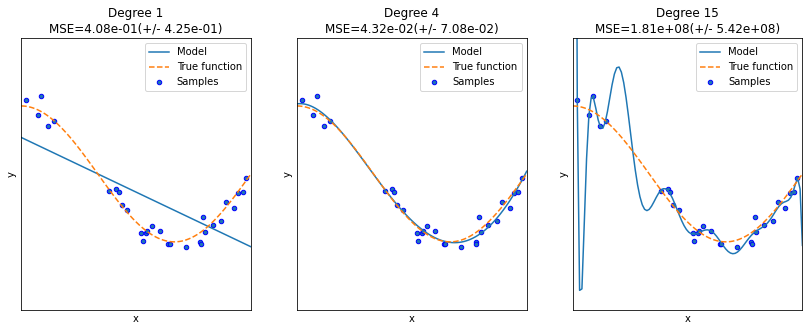

In [31]:
from sklearn.model_selection import cross_val_score

plt.figure(figsize=(14,5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체에 접근하는 name_steps["객체명"]을 이용하여 회귀 계수를 추출
    coefficients = pipeline.named_steps["linear_regression"].coef_
    print("\nDegree {0} 회귀 계수는 {1} 입니다.".format(degrees[i], np.round(coefficients, 2)))
    print("Degree {0} MSE는 {1} 입니다.".format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나누어 회귀 예측을 수행하고, 예측 곡선과 실제 곡선을 그려서 비교\
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), "--", label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.legend(loc="best")
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.title("Degree {}\nMSE={:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()

### 4. 다항 회귀와 과대적합/과소적합 이해
### 4-2. 다항 회귀를 이용한 과소적합 및 과적합 이해
- 실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선이고, 점선으로 표현된 곡선은 실제 데이터 세트 X, y의 코사인 곡선이다.
- 학습 데이터는 0부터 1까지 30개의 임의의 X 값과 그에 따른 코사인 y 값에 잡음을 변동값으로 추가하여 구성했으며, MSE(Mean Squared Error) 평가는 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것이다.

> Degree = 1
 - 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 동일하다. 
 - 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해보이며, 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소 적합 모델이다. 
 - MSE 값은 약 **0.407**이다.

> Degree = 4
 - 예측 곡선은 실제 데이터 세트와 유사한 모습이다.
 - 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터 세트를 비교적 잘 반영하여 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이다.
 - MSE 값은 약 **0.043**으로 가장 뛰어난 예측 성능을 나타낸다.

> Degree = 15
 - 예측 곡선은 데이터 세트의 변동 잡음값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고 테스트 값의 실제 곡선과는 완전히 다른 형태의 모델이다.
 - 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었고, MSE 값이 182815432가 되는 매우 큰 오류 값이 발생했다.

- 좋은 예측 모델은 Degree 1과 같이 학습 데이터의 패턴을 지나치게 단순화한 과소적합 모델도 아니고, Degree 15와 같이 모든 학습 데이터의 패턴을 하나하나 감안한 지나치게 복잡한 과적합 모델도 아니다.
- Degree 4처럼 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 모델을 의미한다.


### 4. 다항 회귀와 과대적합/과소적합 이해
### 4-3. 편향-분산 트레이드오프(Bias-Variance Trade off)
- 편향-분산 트레이드오프는 머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나이다.
- 위의 Degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있으며, 이러한 모델을 **고편향성(High Bias)을 가졌다**고 한다.
- 반대로 Degree 15와 같은 모델은 학습 데이터 하나하나의 특성을 반영한 매우 복잡한 모델로 지나치게 높은 변동성을 가졌으며, 이러한 모델을 **고분산성(High Variance)을 가졌다**고 한다.
- 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다. 즉 편향이 높으면 분산은 낮아지고, 반대로 분산이 높으면 편향이 낮아진다. **높은 편향/낮은 분산**에서 **과소적합**되기 쉬우며, **낮은 편향/높은 분산**에서 **과적합**되기 쉽다.
- 편향이 너무 높으면 전체 오류가 높으며, 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아진다.
- 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 **골디락스** 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하된다.
- 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.